In [63]:
import sqlite3


In [64]:
conn=sqlite3.connect('Sales__data.db')

In [66]:
conn.execute('''
Create Table Salesdata(
id integer primary key,
Products text,
Quantity integer,
Price 
)
''')

In [69]:
conn.executemany( '''
Insert into Salesdata('Products','Quantity','Price') Values (?,?,?)
''',[
('Mobiles',100,12500),
('Laptops',130,30000),
('Speakers',150,10000)
])



In [70]:
conn.commit()
conn.close()

In [73]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
conn=sqlite3.connect('Sales__data.db')


In [89]:
query='''
select
    Products,
    sum(Quantity) AS Total_Quantity,
    sum(Quantity * Price) AS Total_Revenue
from
Salesdata
Group by Products
'''

In [90]:
df=pd.read_sql_query(query,conn)

In [92]:
print('Sales Summary:')
print(df)

Sales Summary:
   Products  total_quantity  total_revenue
0   Laptops             130        3900000
1   Mobiles             100        1250000
2  Speakers             150        1500000


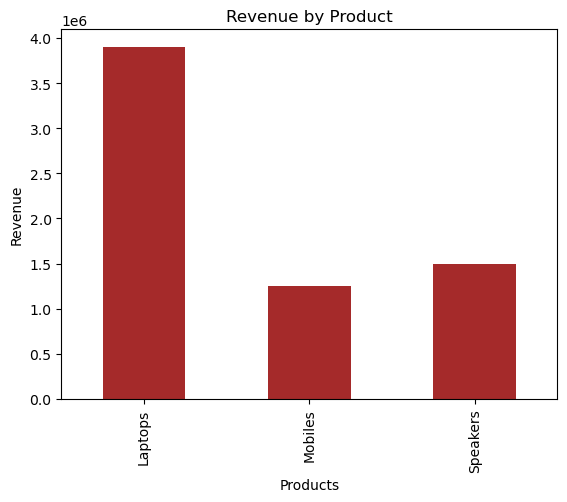

In [102]:
df.plot(kind='bar',x='Products',y='total_revenue',color='Brown',legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.savefig('Sales_chart.png')
plt.show()
          

In [103]:
conn.close()